In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train_path = 'train/'
test = 'test1/'
import cv2

In [3]:
img_size = 128
classes = ['dogs', 'cats']
n_classes = 2
validation = 0.1
n_channels = 3
img_flat = n_channels * img_size * img_size

batch_size = 32


In [4]:
import glob
import cv2
import os

def read_images_in_folder(train_path):
    image_stack = []
    labels = []
    for img in glob.glob('train/*.jpg'): # All jpeg images
        label = img[img.find("/")+1:img.find(".")]
        labels.append(label)
        image = cv2.imread(img)
        img_resize = cv2.resize(image, (128, 128), cv2.INTER_LINEAR)
        image_stack.append(img_resize)
    return np.asarray(image_stack), labels
data, labels = read_images_in_folder(train_path)

In [5]:
labels = [1 if label == 'dog' else 0 for label in labels]

In [6]:


#data = loading.read_data(train_path, img_size, classes, validation=validation)
#test_images, test_ids = loading.read_data_test(test_path, img_size)

In [7]:
labels = np.asarray(labels)

In [8]:
print("Size of:")
print("- Training-set:\t\t{}".format((labels.shape)))
print("- Test-set:\t\t{}".format((data.shape)))


Size of:
- Training-set:		(25000,)
- Test-set:		(25000, 128, 128, 3)


In [9]:
  w4 = weight_var(shape=[3, 3, 24, 64])
    b4 = bias_var([64])
    layer4 = tf.nn.conv2d(layer3, w4, strides=strides1, padding='SAME')
    layer4 = tf.nn.bias_add(layer4, b4)
    layer4 = tf.nn.relu(layer4)
    #print(layer3.get_shape)
    
    w5 = weight_var(shape=[3, 3, 64, 128])
    b5 = bias_var([128])
    layer5 = tf.nn.conv2d(layer4, w5, strides=strides1, padding='SAME')
    layer5 = tf.nn.bias_add(layer5, b5)
    layer5 = tf.nn.relu(layer5)

IndentationError: unexpected indent (<ipython-input-9-1bf9c0fcc687>, line 2)

In [16]:
def weight_var(shape):
    w = tf.truncated_normal(shape=shape, stddev=0.01)
    return tf.Variable(w)

def bias_var(shape):
    b = tf.truncated_normal(shape=shape, stddev=0.01)
    return tf.Variable(b)

def CNN(x_):
    filter_ = 5
    strides1 = [1, 1, 1, 1]
    strides2 = [1, 2, 2, 1]
    ksize = strides2
    
    w1 = weight_var(shape=[3, 3, 3, 32])   
    b1 = bias_var([32])
    layer1 = tf.nn.conv2d(x_, w1, strides=strides1, padding='VALID')  #(, 44, 44, 64)
    layer1 = tf.nn.bias_add(layer1, b1)
    layer1 = tf.nn.relu(layer1)
    #print(layer1.get_shape)
    layer1 = tf.nn.max_pool(layer1, ksize=ksize, strides=strides2, padding='VALID') #(, 22, 22, 64)
    
    
    w2 = weight_var(shape=[3, 3, 32, 32])
    b2 = bias_var([32])
    layer2 = tf.nn.conv2d(layer1, w2, strides=strides1, padding='SAME') #(, 18, 18, 64)
    layer2 = tf.nn.bias_add(layer2, b2)
    #print(layer2.get_shape)
    
    layer2 = tf.nn.relu(layer2)
     
   
    layer2 = tf.nn.max_pool(layer2, ksize=ksize, strides=strides2, padding='SAME') #(, 9, 9, 64)
    #layer2 = tf.nn.dropout(layer2, 0.5)
    
    w3 = weight_var(shape=[3, 3, 32, 64])
    b3 = bias_var([64])
    layer3 = tf.nn.conv2d(layer2, w3, strides=strides1, padding='SAME')
    layer3 = tf.nn.bias_add(layer3, b3)
    layer3 = tf.nn.relu(layer3)

    
    layer_final= tf.nn.max_pool(layer3, ksize=ksize, strides=strides2, padding='SAME')
    
    #layer5 = tf.nn.dropout(layer5, 0.5)
    
    
    flatten = tf.contrib.layers.flatten(layer_final)
    dim = flatten.get_shape().as_list()
    print(dim[1])
    
    wc1 = weight_var(shape=[(dim[1]), 128])
    b_c1 = bias_var([128])
    fc1 = tf.add(tf.matmul(flatten, wc1), b_c1)
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    wc2 = weight_var(shape=[128, 2])
    b_c2 = bias_var([2])
    logits = tf.add(tf.matmul(fc1, wc2), b_c2)
    #fc2 = tf.nn.relu(fc2)
    #fc2 = tf.nn.dropout(fc2, 0.5)

    
    
    return logits
    

In [22]:
tf.reset_default_graph()
from sklearn.model_selection import train_test_split
X_tr, X_val,Y_tr, Y_val = train_test_split(data, labels, test_size = 0.15, random_state=0)


learning_rate = 1e-4

n_labels = len(set(labels))
feat = data.shape[1]
channels = data.shape[3]
batch_size = 32

x = tf.placeholder(dtype=tf.float32, shape=(None, feat, feat, channels))
#x_reshape = tf.reshape(x,[-1, img_size, img_size, n_channels] )
keep_prob = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(tf.int32, shape=(None))
y_hot = tf.one_hot(y, 2)

In [23]:
logits = CNN(x)
softmax = tf.nn.softmax(logits)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_hot))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

prediction = tf.equal(tf.argmax(y_hot, 1), tf.argmax(softmax, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, dtype=tf.float32))


16384


In [24]:
def stats(X_batch, Y_batch):
    total_loss = 0
    total_acc = 0
    samples = len(X_batch)
    #X_batch = np.reshape(X_batch, [-1, n_steps, n_inputs])
    sess = tf.get_default_session()
    for offset in range(0, samples, batch_size):
        end = offset+batch_size
        xs_batch, ys_batch = X_batch[offset:end], Y_batch[offset:end]
        loss_, acc = sess.run([loss, accuracy], feed_dict={x:xs_batch, 
                                                           y:ys_batch,
                                                           keep_prob:1.0
                                                           
                                                           })
        total_loss += (float(loss_)*xs_batch.shape[0])
        total_acc += (float(acc)*xs_batch.shape[0])

    return (total_loss)/samples, (total_acc)/samples

In [25]:
print(X_tr.shape, Y_tr.shape)

(21250, 128, 128, 3) (21250,)


Initializing Training
EPOCH 1
Validation Loss = 0.583 and Validation Accuracy = 68.987 %
EPOCH 2
Validation Loss = 0.535 and Validation Accuracy = 73.280 %
EPOCH 3
Validation Loss = 0.519 and Validation Accuracy = 75.120 %
EPOCH 4
Validation Loss = 0.494 and Validation Accuracy = 75.840 %
EPOCH 5
Validation Loss = 0.513 and Validation Accuracy = 74.213 %
EPOCH 6
Validation Loss = 0.472 and Validation Accuracy = 77.253 %
EPOCH 7
Validation Loss = 0.443 and Validation Accuracy = 78.933 %
EPOCH 8
Validation Loss = 0.439 and Validation Accuracy = 80.027 %
EPOCH 9
Validation Loss = 0.422 and Validation Accuracy = 80.427 %
EPOCH 10
Validation Loss = 0.394 and Validation Accuracy = 82.027 %
EPOCH 11
Validation Loss = 0.398 and Validation Accuracy = 81.867 %
EPOCH 12
Validation Loss = 0.573 and Validation Accuracy = 73.040 %
EPOCH 13
Validation Loss = 0.370 and Validation Accuracy = 83.600 %
EPOCH 14
Validation Loss = 0.371 and Validation Accuracy = 83.253 %
EPOCH 15
Validation Loss = 0.437 an

NameError: name 'test_loss' is not defined

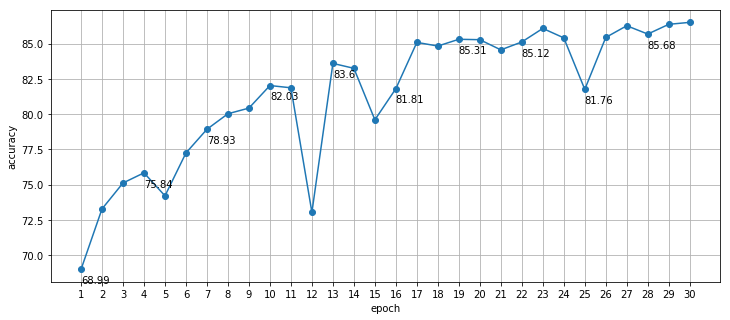

In [26]:

acc_map = []

from sklearn.utils import shuffle
batch_size = 128
epochs = 30
samples = len(X_tr)

count = 0
print("Initializing Training")
try:
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        for epoch in range(epochs):
            X_tr, Y_tr = shuffle(X_tr, Y_tr)
            for offset in range(0, samples, batch_size):
                end = offset+batch_size
                xs_batch, ys_batch = X_tr[offset:end], Y_tr[offset:end]
                loss_, _ = sess.run([loss, optimizer], feed_dict={x: xs_batch, 
                                                                  y: ys_batch,
                                                                  keep_prob:0.5})    

            validation_loss, validation_acc = stats(X_val, Y_val)
            acc_map.append(round(validation_acc*100, 2))
            print("EPOCH {}".format(epoch + 1))
            print ("Validation Loss = {:.3f} and Validation Accuracy = {:.3f} %".format(validation_loss, 100 *validation_acc))
        plt.figure(figsize=(12, 5))
        plt.xticks(range(1, epochs+1))
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.grid(True)
        plt.plot(range(1, epochs+1), acc_map, '-o')
        for i, j in list(zip(range(1, epochs+1), acc_map))[0::3]:
            plt.text(i, j-1, str(j))
        #test_loss, test_acc = sess.run([loss, accuracy], feed_dict={x: xs_batch, 
                                                                    #y: ys_batch,
                                                                    #keep_prob:1.0})  
        print ("Test Loss {} and Test Accuracy {:.3f} %".format(test_loss, 100 *test_acc))
except KeyboardInterrupt:
    print('Training interrupted')